In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Load the image
image_path = "highway.png" #Replace with the path of your file
image = cv2.imread(image_path)

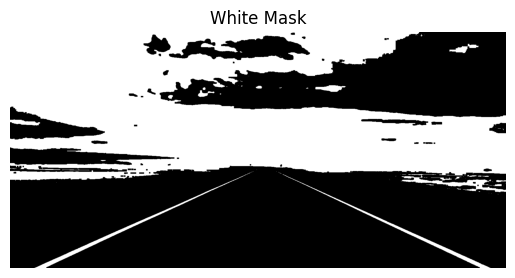

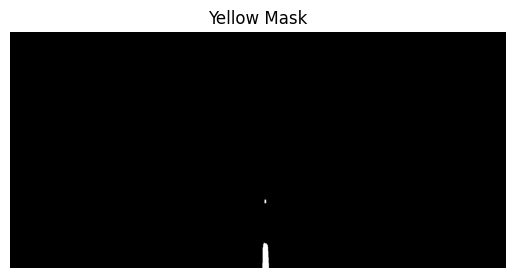

In [4]:
#Convert to HSV for color masking
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

#Color thresholds
white_lower = np.array([0, 0, 200], dtype=np.uint8)
white_upper = np.array([180, 30, 255], dtype=np.uint8)
yellow_lower = np.array([20, 120, 120], dtype=np.uint8)
yellow_upper = np.array([40, 255, 255], dtype=np.uint8)

#Creating Masks
white_mask = cv2.inRange(hsv, white_lower, white_upper)
yellow_mask = cv2.inRange(hsv, yellow_lower, yellow_upper)

#Morphological operations to clean up the masks
kernel = np.ones((5, 5), np.uint8)
white_mask = cv2.morphologyEx(white_mask, cv2.MORPH_CLOSE, kernel)
yellow_mask = cv2.morphologyEx(yellow_mask, cv2.MORPH_CLOSE, kernel)

#Intermediate Results
plt.imshow(white_mask, cmap='gray')
plt.title("White Mask")
plt.axis("off")
plt.show()

plt.imshow(yellow_mask, cmap='gray')
plt.title("Yellow Mask")
plt.axis("off")
plt.show()

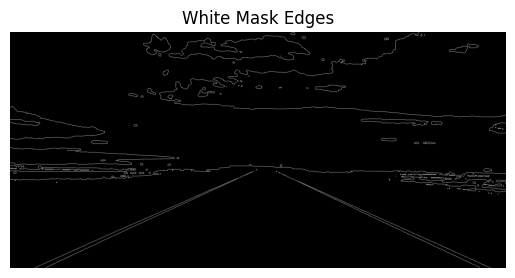

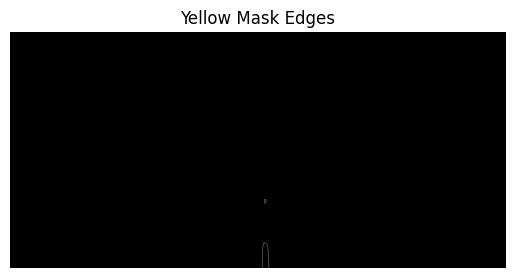

In [5]:
#Using edge detection on the masks
white_edges = cv2.Canny(white_mask, 50, 150)
yellow_edges = cv2.Canny(yellow_mask, 50, 150)

#Intermediate Results
plt.imshow(white_edges, cmap='gray')
plt.title("White Mask Edges")
plt.axis("off")
plt.show()

plt.imshow(yellow_edges, cmap='gray')
plt.title("Yellow Mask Edges")
plt.axis("off")
plt.show()

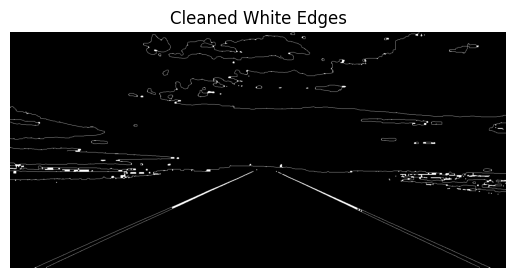

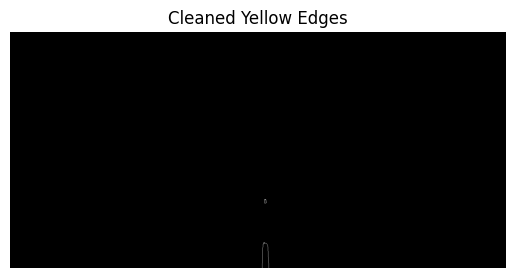

In [6]:
#Clean up the detected edges
white_edges = cv2.morphologyEx(white_edges, cv2.MORPH_CLOSE, kernel)
yellow_edges = cv2.morphologyEx(yellow_edges, cv2.MORPH_CLOSE, kernel)

#Intermediate Results
plt.imshow(white_edges, cmap='gray')
plt.title("Cleaned White Edges")
plt.axis("off")
plt.show()

plt.imshow(yellow_edges, cmap='gray')
plt.title("Cleaned Yellow Edges")
plt.axis("off")
plt.show()

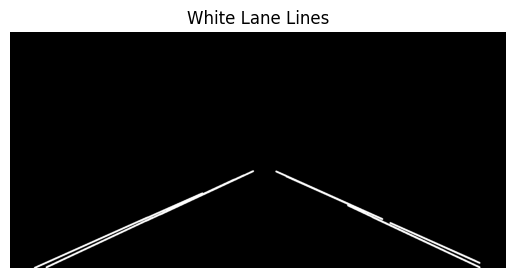

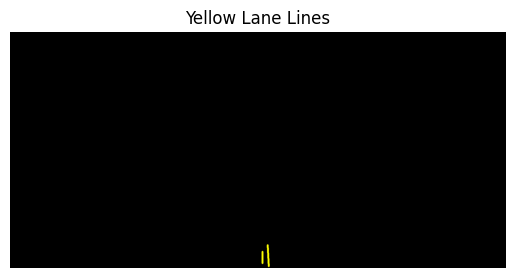

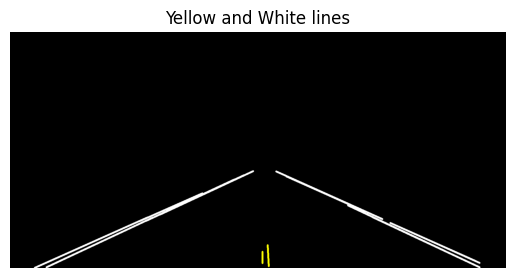

In [8]:
#Hough Transform to detect lines
white_lines = cv2.HoughLinesP(white_edges, 1, np.pi/180, 50, minLineLength=200, maxLineGap=10) 
yellow_lines = cv2.HoughLinesP(yellow_edges, 1, np.pi/180, 40, minLineLength=1, maxLineGap=10)

#Submission Requirements
white_line_image = np.zeros_like(image)
yellow_line_image = np.zeros_like(image)
lane_overlay = np.zeros_like(image)

def draw_lines(image, lines, color):
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(image, (x1, y1), (x2, y2), color, 5)

draw_lines(white_line_image, white_lines, (255, 255, 255))
draw_lines(yellow_line_image, yellow_lines, (0, 255, 255))

draw_lines(lane_overlay, white_lines, (255, 255, 255))
draw_lines(lane_overlay, yellow_lines, (0, 255, 255))

#Display Results
plt.imshow(cv2.cvtColor(white_line_image, cv2.COLOR_BGR2RGB))
plt.title("White Lane Lines")
plt.axis("off")
plt.show()
plt.imshow(cv2.cvtColor(yellow_line_image, cv2.COLOR_BGR2RGB))
plt.title("Yellow Lane Lines")
plt.axis("off")
plt.show()
plt.imshow(cv2.cvtColor(lane_overlay, cv2.COLOR_BGR2RGB))
plt.title("Yellow and White lines")
plt.axis("off")
plt.show()

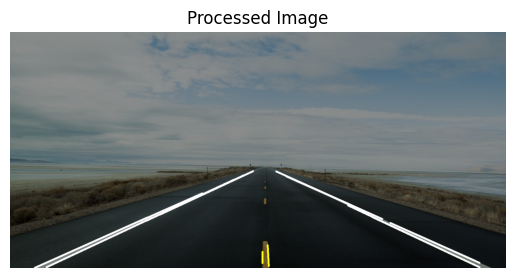

In [7]:
#Blending 
final_result = cv2.addWeighted(image, 0.6, lane_overlay, 1, -10)

#Processed Image
plt.imshow(cv2.cvtColor(final_result, cv2.COLOR_BGR2RGB))
plt.title("Processed Image")
plt.axis("off")
plt.show()

In [8]:
#Output files
cv2.imwrite("white_lane_lines.png", white_line_image)
cv2.imwrite("yellow_lane_lines.png", yellow_line_image)
cv2.imwrite("processed_highway.png", final_result)

True